# Práctica I - Graficación en tiempo real de datos leídos desde instrumentos

Alan Badillo Salas (badillo.soft@hotmail.com)

## Introducción

En está práctica vamos a crear una gráfica en tiempo real de datos adquiridos desde un instrumento. 

### Fundamentos

* Manejo de hilos
* Manejo de buffers
* Instrumento Simulado
* Gráfica Dinámica

### Práctica

1. Crear un hilo que llene un buffer global con un instrumento simulado
    1. Crear un variable de paro
    2. Crear una función que cree el instrumento y haga lecturas hasta la variable de paro 
    3. Crear un hilo que llame a la función
    4. Crear una función que imprima las lecturas del buffer con retardo
    5. Crear un hilo que llame a la función de impresión del buffer
2. Graficar el buffer
    1. Crear una función que grafique el buffer con retardo
    2. Crear un hilo que llame a la función de graficación del buffer
    3. Cambiar la bandera de paro

### Instrucciones

Lee los fundamentos de la práctica y realiza los ejercicios señalados. Una vez realizados todos los ejercicios procede a completar los pasos de la práctica y resuelve los problemas de la práctica. Una vez completada la práctica envíala al correo de arriba indicando el título de la práctica y tu nombre completo.

## Fundamento I - Manejo de Hilos

Los hilos son procesos que se ejecutan en diferentes contexto permitiendo generar código concurrente o a *"paralelo"*.

Un hilo consiste en ejecutar una función en un flujo distinto al principal, permitiendo que el flujo principal no sea bloqueado.

Ejemplo, imagina un programa que manda a llamar a dos funciones como en el siguiente código.

In [4]:
import time

def dormir(segundos):
    print("voy a dormir {} segundos".format(segundos))
    time.sleep(segundos)
    print("listo ya pasaron {} segundos".format(segundos))
    
def imprimir(mensaje):
    print(mensaje)
    
inicio = time.time()
    
# Llamamos a la función dormir con parámetro 10
# > duerme al flujo actual (el principal) por 10 segundos
dormir(10)

# Llamamos a la función imprimir
# > se manda a llamar hasta que la función aterior termina
imprimir("¿Cuánto tiempo ha pasado?")

fin = time.time()

diferencia = (fin - inicio)

imprimir("Han pasado {:.2f} segundos".format(diferencia))

voy a dormir 10 segundos
listo ya pasaron 10 segundos
¿Cuánto tiempo ha pasado?
Han pasado 10.00 segundos


El ejemplo anterior define dos funciones, una llamada dormir que bloquea el flujo corriente (el principal) durante el número de segundos específicados y otra función para imprimir un mensaje.

En el flujo podemos ver claramente la llamada a la función `dormir(10)` y después la llamada a la función `imprimir("¿Cuánto timepo ha pasado?")`.

Vamos ahora a modificar el código anterior para mandar a llamar a la función dormir en un hilo y veamos la diferencia.

In [5]:
import time
from threading import Thread

def dormir(segundos):
    print("voy a dormir {} segundos".format(segundos))
    time.sleep(segundos)
    print("listo ya pasaron {} segundos".format(segundos))
    
def imprimir(mensaje):
    print(mensaje)
    
inicio = time.time()
    
# Creamos un hilo que ejecute a la función dormir
# se le envían los argumentos `(10,)`, esto es una 1-tupla no es (10) que quivale al 10
t = Thread(target=dormir, args=(10,))

# Iniciamos el hilo en un flujo independiente al principal
# > Llama a la función dormir con los argumentos establecidos
t.start()

# Llamamos a la función imprimir
# > se manda a llamar inmediatemente después de iniciar el hilo
# > no debe esperar nada acerca de la función dormir ya que está en otro flujo
imprimir("¿Cuánto tiempo ha pasado?")

fin = time.time()

diferencia = (fin - inicio)

imprimir("Han pasado {:.2f} segundos".format(diferencia))

# Detenemos el flujo principal hasta que acabe el hilo de ejecutarse
t.join()

# En este momento el flujo del hillo `t` ya terminó
# Mostramos cuánto tiempo pasó

fin = time.time()

diferencia = (fin - inicio)

imprimir("Han pasado {:.2f} segundos después de esperar al hilo `t`".format(diferencia))

voy a dormir 10 segundos
¿Cuánto tiempo ha pasado?
Han pasado 0.00 segundos
listo ya pasaron 10 segundos
Han pasado 10.00 segundos después de esperar al hilo `t`


Observa que `t.start()` inicial el hilo definido (ejecuta la función *target* con la tupla de argumentos definidos en *args*), este hilo es iniciado en un flujo independiente al principal, por lo que el hilo principal puede continuar con la ejecución de las siguientes expresiones.

Observa que `t.join()` detiene el flujo corriente (el principal), hasta que el hilo `t` termina de ejecutarse, esto es muy útil para sincronizar dos hilos que duren distinto tiempo como se muestra en el siguiente ejemplo.

In [7]:
import time
from threading import Thread

def dormir(segundos):
    print("voy a dormir {} segundos".format(segundos))
    time.sleep(segundos)
    print("listo ya pasaron {} segundos".format(segundos))
    
inicio = time.time()
    
t1 = Thread(target=dormir, args=(10,)) # Este hilo dormirá 10 segundos

t2 = Thread(target=dormir, args=(5,)) # Este hilo dormirá 5 segundos

t1.start(), t2.start() # iniciamos los hilos al mismo tiempo

t1.join(), t2.join() # esperamos los hilos al mismo tiempo

# En este momento han pasado al rededor de 10 segundos no 15 segundos!

fin = time.time()

diferencia = (fin - inicio)

imprimir("Han pasado {:.2f} segundos".format(diferencia))

voy a dormir 10 segundos
voy a dormir 5 segundos
listo ya pasaron 5 segundos
listo ya pasaron 10 segundos
Han pasado 10.01 segundos


## Ejercicio 1.1

Crea tres hilos que llamen a la función `dormir` con valores enteros aleatorios entre 5 y 10 segundos como argumento. Muestra el tiempo transcurrido final después de esperar a los 3 hilos.

## Fundamento II - Manejo de Buffers

Un `Buffer` es una lista de tamaño máximo acotado, la cuál debe quitar el primer elemento si se llena para insertar el siguiente elemento al final. Es fácil crear un buffer usando las listas de python y verificando que cuándo se supere el tamaño máximo se quite el primer elemento antes de insertar el siguiente valor al final, es decir, si tamaño de buffer es mayor al tamaño máximo, quita el primer elemento e inserta el siguiente elemento al final.

Veamos un ejemplo a mano.

In [10]:
buffer = [1, 2, 3]

MAX = 5

if len(buffer) >= MAX:
    buffer.pop(0)
buffer.append(4) # [1, 2, 3, 4]

if len(buffer) >= MAX:
    buffer.pop(0)
buffer.append(5) # [1, 2, 3, 4, 5]

if len(buffer) >= MAX:
    buffer.pop(0)
buffer.append(6) # [2, 3, 4, 5, 6]

if len(buffer) >= MAX:
    buffer.pop(0)
buffer.append(7) # [3, 4, 5, 6, 7]

if len(buffer) >= MAX:
    buffer.pop(0)
buffer.append(8) # [4, 5, 6, 7, 8]

print(buffer)

[4, 5, 6, 7, 8]


Podemos crear una función que tome el buffer y le acumule un nuevo valor siguiendo el algoritmo, para simplificar el código.

In [13]:
def accum(buffer, value):
    if len(buffer) >= MAX:
        buffer.pop(0)
    buffer.append(value)
    
buffer = [1, 2, 3]
MAX = 5

accum(buffer, 4)
accum(buffer, 5)
accum(buffer, 6)
accum(buffer, 7)
accum(buffer, 8)

print(buffer)

[4, 5, 6, 7, 8]


Ahora podemos crear una clase llamada `Buffer` que aplique varios métodos utiles para trabajar con buffers.

In [30]:
class Buffer:
    def __init__(self, MAX, *values):
        self.MAX = MAX
        self.buffer = list(values)[-MAX:]
    def accum(self, value):
        if len(self.buffer) >= self.MAX:
            self.buffer.pop(0)
        self.buffer.append(value)
    def reset(self):
        self.buffer = []
    def fill(self, value):
        while len(self.buffer) < self.MAX:
            self.buffer.append(value)
    def full(self, value):
        self.buffer = [value] * self.MAX
    def isEmpty(self):
        return len(self.buffer) == 0
    def isFull(self):
        return len(self.buffer) == self.MAX
    def __str__(self):
        s1 = "E" if self.isEmpty() else "!E"
        s2 = "F" if self.isFull() else "!F"
        return "Buffer: {} {} {}".format(self.buffer, s1, s2)

In [ ]:
# Ejemplo 1
buffer = Buffer(5, 1, 2, 3) # MAX = 5; values = [1, 2, 3]

print(buffer)

buffer.accum(4)
buffer.accum(5)
buffer.accum(6)
buffer.accum(7)
buffer.accum(8)

print(buffer)

In [26]:
# Ejemplo 2
buffer = Buffer(5) # MAX = 5; values = []

print(buffer)

buffer.accum(4)
buffer.accum(5)
buffer.accum(6)
buffer.accum(7)

print(buffer)

Buffer: [] E !F
Buffer: [4, 5, 6, 7] !E !F


In [28]:
# Ejemplo 3
buffer = Buffer(10, 1, 2, 3) # MAX = 10; values = [1, 2, 3]

buffer.fill(0) # rellena faltantes

print(buffer)

Buffer: [1, 2, 3, 0, 0, 0, 0, 0, 0, 0] !E F


In [31]:
# Ejemplo 4
buffer = Buffer(10, 1, 2, 3) # MAX = 10; values = [1, 2, 3]

buffer.full(0) # llena todos (sobreescribe!)

print(buffer)

Buffer: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0] !E F


## Ejercicio 1.2

1. Crea un archivo llamado `lib.py` y agrega la definición de la clase `Buffer`.
2. Importa la clase `Buffer` de la librería `lib` usando **`from lib import Buffer`**.
2. Crea un buffer de 30 elementos y llenalo con valores aleatorios entre 0 y 1 usando `numpy`, luego muestra la gráfica actual de buffer usando `matplolib` y una gráfica de serie.

## Fundamento III - Instrumento Simulado

Vamos a definir una clase que simule un instrumento y sus lecturas, cada lectura nos devolverá el coseno del tiempo al momento de la lectura.

In [31]:
import math
import time

class InstrumentoSim:
    def read(self):
        return math.cos(time.time())

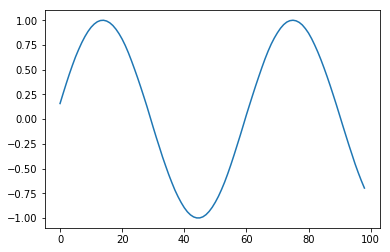

In [32]:
# Ejemplo

instrumento = InstrumentoSim()

lecturas = []

for i in range(1, 100):
    lecturas.append(instrumento.read())
    time.sleep(0.1) # dormimos 100 milisegundos o 0.1 segundos
    
import matplotlib.pyplot as plt

plt.plot(lecturas)
plt.show()

## Ejercicio 1.3

1. Agrega la definición de la clase `InstrumentoSim` al archivo `lib.py` y también las librerías math y time.
2. Importa la clase `InstrumentoSim` del módulo `lib.py`.
3. Crea un instrumento usando la clase `InstrumentoSIm` y almacena 20 lecturas con invervalos de 0.3 usando marcadores de `*` para resaltar los puntos de lectura.

## Fundamento IV - Gráfica Dinámica

Vamos a ahora a realizar una gráfica dinámica en jupyter que será muy útil. Primero debemos instalar la extensión `ipympl`.

In [ ]:
! pip install ipympl

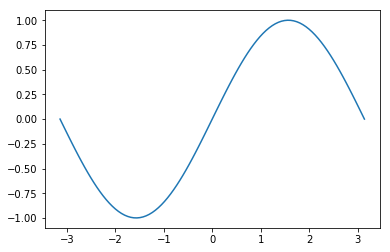

In [54]:
%matplotlib inline

from IPython import display
import matplotlib.pyplot as plt
import numpy as np
import random
import time

phi = 0

for i in range(20):
    phi += np.pi / 10
    x = np.linspace(-np.pi, np.pi, 100)
    y = np.sin(x + phi * np.ones(100))
    
    plt.clf()
    plt.plot(x, y)
    
    display.clear_output(wait=True)
    display.display(plt.gcf())
    
    time.sleep(0.05)

display.clear_output(wait=True)

## Ejercicio 1.4

1. Revisa el siguiente código y explica línea por línea en comentarios.
2. Calcula la diferencia de tiempo que tarda el instrumento en alcanzar dos máximos.
3. Basado en el tiempo anterior, calcula el periodo de la función conseno.
4. Calcula aproximadamente cuántos datos completan un periodo.
5. Ajusta el buffer al valor calculado anteriormente, para que sólo acumule los datos de un periodo.

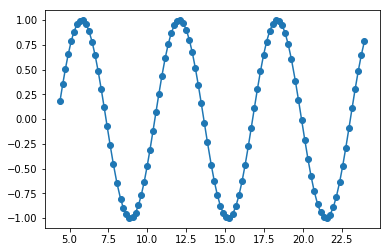

In [20]:
%matplotlib inline

from IPython import display
import matplotlib.pyplot as plt
import numpy as np
import random
import time

from lib import Buffer, InstrumentoSim

instrumento = InstrumentoSim

bufferX = Buffer(100)
bufferY = Buffer(100)

start = time.time()

for i in range(1, 122):
    bufferX.accum(time.time() - start)
    bufferY.accum(instrumento.read())
    
    plt.clf()
    plt.plot(bufferX.buffer, bufferY.buffer, "o-")
    
    display.clear_output(wait=True)
    display.display(plt.gcf())
    
display.clear_output(wait=True)

# Práctica I - Graficación en tiempo real de datos leídos desde instrumentos

## Práctica
1. Crear un hilo que llene un buffer global con un instrumento simulado
    1. Crear un variable de paro
    2. Crear una función que cree el instrumento y haga lecturas hasta la variable de paro 
    3. Crear un hilo que llame a la función
    4. Crear una función que imprima las lecturas del buffer con retardo
    5. Crear un hilo que llame a la función de impresión del buffer
2. Graficar el buffer
    1. Crear una función que grafique el buffer con retardo
    2. Crear un hilo que llame a la función de graficación del buffer
    3. Cambiar la bandera de paro

En esta práctica vamos a realizar la lectura de un instrumento (real o simulado) usando hilos, en el hilo vamos a leer la lectura y acumularla en un hilo. También debemos graficar el buffer con las lecturas.

## Paso 1. Crear un hilo que llene un buffer global con un instrumento simulado

### 1.A Crear un variable de paro

In [1]:
from IPython.display import display, clear_output
import matplotlib.pyplot as plt

from lib import Buffer

buffer = Buffer(10)

### 1.B. Crear una función que cree el instrumento y haga lecturas hasta la variable de paro

In [13]:
from lib import InstrumentoSim

def crearLeerInstrumento():
    instrumento = InstrumentoSim()
    while not paro:
        lectura = instrumento.read()
        
        buffer.accum(lectura)
        
        clear_output(wait=True)

        plt.clf()
        plt.plot(buffer.buffer)

        display(plt.gcf())
    clear_output(wait=True)

### 1.C. Crear un hilo que llame a la función

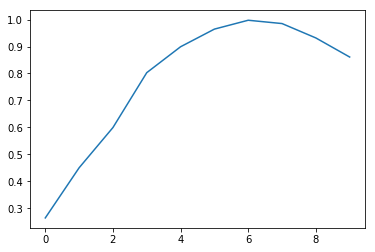

In [14]:
from threading import Thread

paro = False

t = Thread(target = crearLeerInstrumento)

t.start()

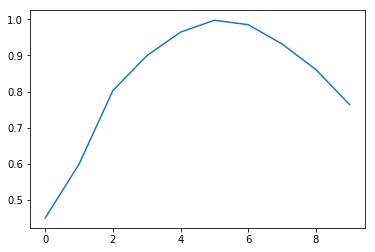

In [15]:
paro = True

t.join()

clear_output(wait=True)